## Transformers

Transformers proporciona APIs para descargar y entrenar fácilmente modelos preentrenados de última generación

In [ ]:
from transformers import pipeline

# Cargamos el modelo CV pre-entrenado
classifier = pipeline(task="image-classification")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


In [ ]:
# Realizamos las predicciones
preds = classifier(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
)
print(*preds, sep="\n")

{'label': 'lynx, catamount', 'score': 0.4334999918937683}
{'label': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor', 'score': 0.03479619696736336}
{'label': 'snow leopard, ounce, Panthera uncia', 'score': 0.03240193426609039}
{'label': 'Egyptian cat', 'score': 0.023944776505231857}
{'label': 'tiger cat', 'score': 0.02288924716413021}


## Identificación de Números Manuscritos



### Solución con Redes Neuronales Convolucionales CNNs

In [ ]:
import numpy as np
import keras
from keras.layers import Dense,Flatten, Dropout,Conv2D,MaxPooling2D,Activation
from keras.models import Sequential
from keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1).astype('float32')
x_test  = x_test.reshape(10000, 28, 28, 1).astype('float32')

x_train /= 255
x_test /= 255

n_classes = 10 #because we have 10 output

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [ ]:
model = Sequential()
model.add(keras.Input(shape=(28, 28, 1)),)
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='RMSprop'  ,metrics=['accuracy'])

model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128 ,validation_data=(x_test, y_test))

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(f"\nPrecisión en el conjunto de prueba: {test_acc:.4f}")

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 99ms/step - accuracy: 0.8149 - loss: 0.6082 - val_accuracy: 0.9743 - val_loss: 0.0886
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.9639 - loss: 0.1194 - val_accuracy: 0.9791 - val_loss: 0.0668
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 96ms/step - accuracy: 0.9728 - loss: 0.0854 - val_accuracy: 0.9847 - val_loss: 0.0456
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 102ms/step - accuracy: 0.9778 - loss: 0.0722 - val_accuracy: 0.9839 - val_loss: 0.0482
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 99ms/step - accuracy: 0.9804 - loss: 0.0629 - val_accuracy: 0.9876 - val_loss: 0.0355
313/313 - 2s - 7ms/step - accuracy: 0.9876 - loss: 0.0355

Precisión en el conjunto de prueba: 0.9876


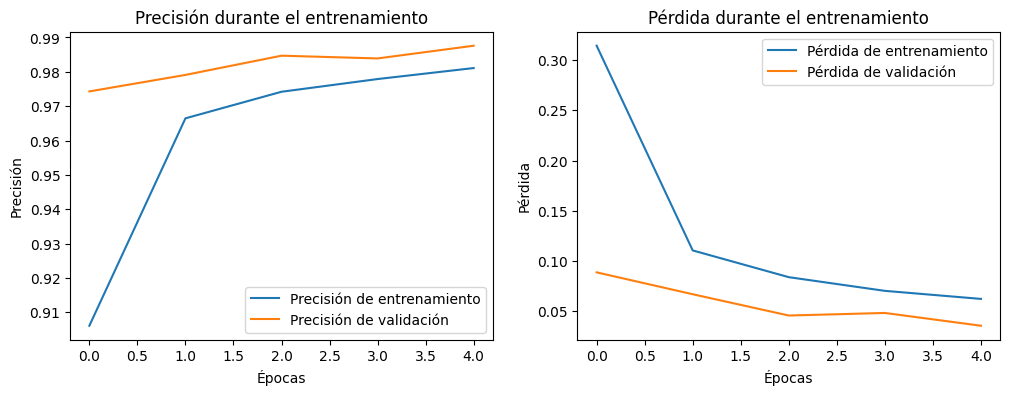

In [ ]:
# Graficar la precisión y pérdida del entrenamiento
plt.figure(figsize=(12, 4))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

### Solución con solamente Redes Neuronales Profundas DL

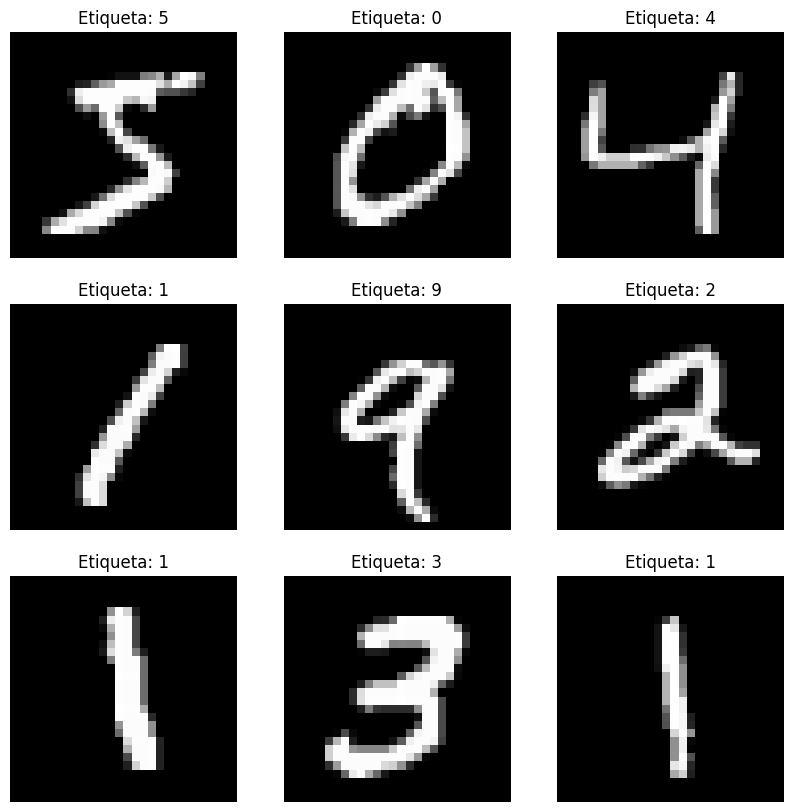

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers, models
from keras.datasets import mnist

# Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar las imágenes (valores entre 0 y 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Mostrar algunas imágenes del dataset
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis("off")
plt.show()


In [ ]:
# Crear el modelo
model = models.Sequential()

# Aplanar la imagen 28x28 en un vector de 784
model.add(layers.Flatten(input_shape=(28, 28)))

# Añadir capas ocultas densamente conectadas
model.add(layers.Dense(128, activation='relu'))  # Capa oculta de 128 neuronas
model.add(layers.Dense(64, activation='relu'))   # Capa oculta de 64 neuronas

# Capa de salida con 10 neuronas (una para cada clase)
model.add(layers.Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_18 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=5, batch_size=128 ,validation_data=(x_test, y_test))

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(f"\nPrecisión en el conjunto de prueba: {test_acc:.4f}")


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8251 - loss: 0.6142 - val_accuracy: 0.9545 - val_loss: 0.1559
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9594 - loss: 0.1395 - val_accuracy: 0.9680 - val_loss: 0.1083
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9722 - loss: 0.0950 - val_accuracy: 0.9721 - val_loss: 0.0905
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9791 - loss: 0.0706 - val_accuracy: 0.9732 - val_loss: 0.0892
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9830 - loss: 0.0549 - val_accuracy: 0.9734 - val_loss: 0.0831
313/313 - 0s - 1ms/step - accuracy: 0.9734 - loss: 0.0831

Precisión en el conjunto de prueba: 0.9734


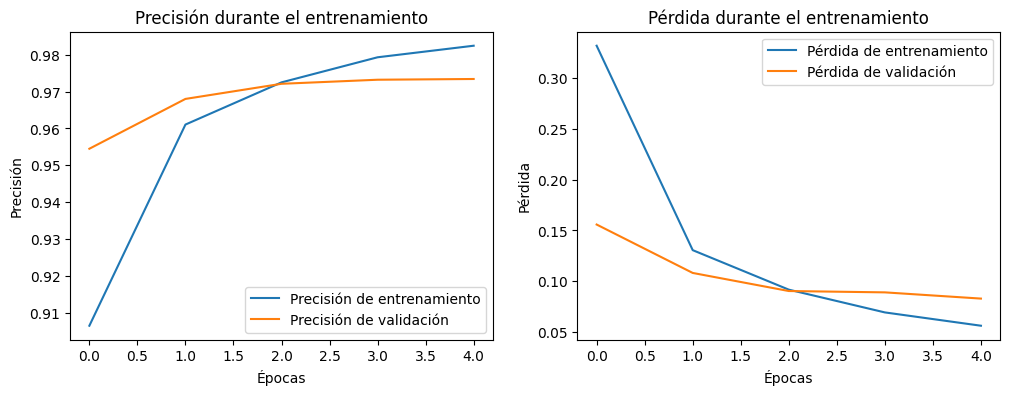

In [ ]:
# Graficar la precisión y pérdida del entrenamiento
plt.figure(figsize=(12, 4))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()
